# Graphical Models: Similarity Distribution Experimentation

In [15]:
# Import necessary libraries
from sde import *

## Experiment

### make directed graph

In [16]:
g = makeDirectedGraph(15, 17)
nx.edges(g)

OutEdgeView([(0, 8), (1, 5), (2, 10), (3, 12), (5, 14), (8, 7), (8, 13), (9, 5), (9, 10), (9, 13), (9, 2), (11, 10), (11, 0), (12, 3), (13, 4)])

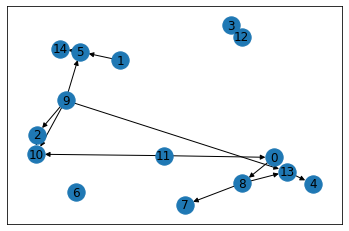

In [17]:
nx.draw_networkx(g)

In [18]:
nx.get_edge_attributes(g, 'weight')

{(0, 8): 0.10705481082284529,
 (1, 5): 0.33789950082167586,
 (2, 10): 0.20042539272764914,
 (3, 12): 0.0027635293534530314,
 (5, 14): 0.9337957965416462,
 (8, 7): 0.3165671855854175,
 (8, 13): 0.6306370273480687,
 (9, 5): 0.6652249756886771,
 (9, 10): 0.04034587693959979,
 (9, 13): 0.021458901906325933,
 (9, 2): 0.9665335215008626,
 (11, 10): 0.7037568337021488,
 (11, 0): 0.9247423800060931,
 (12, 3): 0.7322693029704619,
 (13, 4): 0.9243059023924293}

In [19]:
# clique size
import itertools as it
from networkx.algorithms import approximation
from networkx.algorithms.approximation import clique

In [20]:
max_clique = clique.max_clique(g)
print(max_clique)

{9, 13}


# Finding the largest size clique

# Similarity Implementation: Edit-Distance

In [21]:
list_max_clique  = list(max_clique)
A = list_max_clique[0]
B = list_max_clique[1]

print(A)
print(B)

9
13


In [22]:
a = get_all_children(g, A)
a

{0: 0.17432437623921526,
 12: 0.141006931853849,
 2: 0.9665335215008626,
 9: 0.26879426888764013,
 5: 0.6652249756886771,
 14: 0.6211842860526054,
 10: 0.1937178606312481,
 13: 0.021458901906325933,
 4: 0.019834589690877213}

In [23]:
b = get_all_children(g,B)
b

{0: 0.17432437623921526,
 12: 0.141006931853849,
 2: 0.9665335215008626,
 9: 0.26879426888764013,
 5: 0.6652249756886771,
 14: 0.6211842860526054,
 10: 0.1937178606312481,
 13: 0.021458901906325933,
 4: 0.9243059023924293}

Edit distance by a node's child

In [24]:
get_immediate_similarity(g, A, B)

1.0

In [25]:
find_most_immediate_similar(g, A)

2

In [26]:
#find_most_immediate_similar(g, B)

In [27]:
nodes = list(g.nodes)
nodes.remove(A)

for node in nodes:
    node_similarity = get_immediate_similarity(g, A, node)
    print("Node:", node)
    print("Similarity:", node_similarity)
    print()

Node: 0
Similarity: 1.0

Node: 1
Similarity: 0.8318313687167503

Node: 2
Similarity: 0.7900198789470123

Node: 3
Similarity: 1.0

Node: 4
Similarity: 1.0

Node: 5
Similarity: 1.0

Node: 6
Similarity: 1.0

Node: 7
Similarity: 1.0

Node: 8
Similarity: 0.9022945313604357

Node: 10
Similarity: 1.0

Node: 11
Similarity: 0.9158527391906373

Node: 12
Similarity: 1.0

Node: 13
Similarity: 1.0

Node: 14
Similarity: 1.0



Edit-distance similarity implementation based on all descendants of a node.

In [28]:
A_desc = get_descendants(g, A)
A_desc

{5: 0.6652249756886771,
 14: 0.6211842860526054,
 10: 0.1937178606312481,
 13: 0.021458901906325933,
 4: 0.019834589690877213,
 2: 0.9665335215008626}

In [29]:
B_desc = get_descendants(g, B)
B_desc

{5: 0.6652249756886771,
 14: 0.6211842860526054,
 10: 0.1937178606312481,
 13: 0.021458901906325933,
 4: 0.9243059023924293,
 2: 0.9665335215008626}

In [30]:
get_full_similarity(g, A, B)

0.9840785521169253

# Finding all maximal cliques

In [31]:
from networkx.algorithms.approximation import independent_set
mis = independent_set.maximum_independent_set(g)
print(mis)

{0, 1, 2, 3, 4, 6, 7, 9, 11, 14}


In [32]:
from networkx.algorithms.approximation import clique
cliq_rem = clique.clique_removal(g)
print(cliq_rem)

({0, 1, 2, 3, 4, 6, 7, 9, 11, 14}, [{9, 10, 2}, {8, 0}, {1, 5}, {3, 12}, {4, 13}, {6}, {7}, {11}, {14}])


In [33]:
cliques = cliq_rem[1]     #retrieve list of maximal cliques in the graph
print(cliques)

[{9, 10, 2}, {8, 0}, {1, 5}, {3, 12}, {4, 13}, {6}, {7}, {11}, {14}]
